<a href="https://colab.research.google.com/github/marceloribasDev/fundamentosPython/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

- Analisar dados de um banco que concessao de credito.
- Objetivo: Futuro clientes serao bons ou maus pagadores de credito.

Importar aqui Credit.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
credito_csv = pd.read_csv("Credit.csv")
credito_csv.head()

In [ ]:
labelencoder = LabelEncoder()

for i in credito_csv.select_dtypes(include="object"):
    if i != "class":
        credito_csv[i] = labelencoder.fit_transform(credito_csv[i])

In [ ]:
credito_csv.head()

In [ ]:
previsores = credito_csv.iloc[:,0:20].values
classe = credito_csv.iloc[:,20].values

In [ ]:
previsores

In [ ]:
classe

In [ ]:
x_training, x_test, y_training, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state=0)

In [ ]:
print(x_training.shape)
print(x_test.shape)
print(y_training.shape)
print(y_test.shape)

In [ ]:
# Treinando e testando o modelo de machine learning

floresta = RandomForestClassifier(n_estimators=500,random_state=0)

floresta.fit(x_training,y_training)

In [ ]:
previsoes = floresta.predict(x_test)
print(previsoes)

In [ ]:
confusao = confusion_matrix(y_test, previsoes)
print(confusao)

In [ ]:
matched = accuracy_score(y_test, previsoes)
print(matched)

In [ ]:
# Agrupamentos
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()

In [ ]:
print("dados: ", iris.data)

In [30]:
print("classe: ", iris.target)

classe:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print("nome classe: ", iris.target_names)

In [ ]:
print("nome dos atributos: ", iris.feature_names)

In [27]:
unicos, quantidade = np.unique(iris.target, return_counts=True)
print(unicos)
print(quantidade)

[0 1 2]
[50 50 50]


In [28]:
cluster = KMeans(n_clusters=3)
cluster.fit(iris.data)

KMeans(n_clusters=3)

In [29]:
agrupamentos = cluster.labels_
print(agrupamentos)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [31]:
unicos, quantidade = np.unique(agrupamentos, return_counts=True)
print(unicos)
print(quantidade)

[0 1 2]
[38 50 62]


In [32]:
resultados = confusion_matrix(iris.target, agrupamentos)
print(resultados)

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [34]:
acuracia = accuracy_score(iris.target,agrupamentos)
print(acuracia)

0.09333333333333334


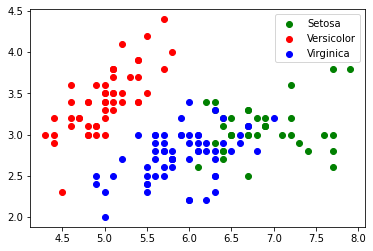

In [37]:
plt.scatter(iris.data[agrupamentos == 0, 0], iris.data[agrupamentos == 0,1], c="green", label="Setosa")
plt.scatter(iris.data[agrupamentos == 1, 0], iris.data[agrupamentos == 1,1], c="red", label="Versicolor")
plt.scatter(iris.data[agrupamentos == 2, 0], iris.data[agrupamentos == 2,1], c="blue", label="Virginica")
plt.legend()